# Week 1

## Доверительные интервалы

### Practice Quiz: Доверительные интервалы для среднего

#### 2.

Для 61 большого города в Англии и Уэльсе известны средняя годовая смертность на 100000 населения (по данным 1958–1964) и концентрация кальция в питьевой воде (в частях на миллион). Чем выше концентрация кальция, тем жёстче вода. Города дополнительно поделены на северные и южные.

Постройте 95% доверительный интервал для средней годовой смертности в больших городах. Чему равна его нижняя граница? Округлите ответ до 4 знаков после десятичной точки.

**Будьте осторожны при использовании метода std()!** Дело в том, что у объекта numpy он по умолчанию вычисляется как $\sqrt{\frac1{n}\sum\limits_{i=1}^n\left(X_i-\bar{X}\right)^2}$ а у объекта pandas — как $\sqrt{\frac1{n-1}\sum\limits_{i=1}^n\left(X_i-\bar{X}\right)^2}$

Нас интересует только второй вариант, несмещённая оценка стандартного отклонения.

Чтобы не думать всё время о том, правильно ли вычисляется в вашем случае std(), можно всегда использовать std(ddof=1) (ddof — difference in degrees of freedom), тогда нормировка всегда будет на n-1.

In [1]:
import math
import numpy as np
import pandas as pd
from statsmodels.stats.weightstats import _zconfint_generic, _tconfint_generic

import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

data = pd.read_csv('water.txt', delimiter='\t')
data.head(5)

Populating the interactive namespace from numpy and matplotlib


,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


In [2]:
def get_interval(column):
    mean, std = column.mean(), column.std(ddof=1)
    return _tconfint_generic(mean, std/np.sqrt(len(column)), len(column) - 1, 0.05, 'two-sided')

In [3]:
round(get_interval(data['mortality'])[0], ndigits=4)

1476.0833

#### 3.

На данных из предыдущего вопроса постройте 95% доверительный интервал для средней годовой смертности по всем южным городам. Чему равна его верхняя граница? Округлите ответ до 4 знаков после десятичной точки.

In [4]:
round(get_interval(data[data.location == 'South']['mortality'])[1], ndigits=4)

1433.4636

#### 4.

На тех же данных постройте 95% доверительный интервал для средней годовой смертности по всем северным городам. Пересекается ли этот интервал с предыдущим? Как вы думаете, какой из этого можно сделать вывод?

In [5]:
get_interval(data[data.location == 'North']['mortality'])

(1586.5605251961385, 1680.6394748038613)

#### 5.
Пересекаются ли 95% доверительные интервалы для средней жёсткости воды в северных и южных городах?

In [6]:
get_interval(data[data.location == 'North']['hardness']), get_interval(data[data.location == 'South']['hardness'])

((21.422487285724259, 39.377512714275738),
 (53.467198692036106, 86.071262846425441))

#### 6.

Вспомним формулу доверительного интервала для среднего нормально распределённой случайной величины с дисперсией $\sigma^2$: 

$\bar{X}_n\pm z_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}}$

При $\sigma=1$ какой нужен объём выборки, чтобы на уровне доверия 95% оценить среднее с точностью $\pm0.1$?

In [7]:
# TODO

### Practice Quiz: Доверительные интервалы для долей

In [8]:
# TODO

### Quiz: Доверительные интервалы

#### 1.

Давайте уточним правило трёх сигм. Утверждение: 99.7% вероятностной массы случайной величины $X\sim N\left(\mu,\sigma^2\right)$ лежит в интервале $\mu\pm c \cdot \sigma$. Чему равно точное значение константы $c$? Округлите ответ до четырёх знаков после десятичной точки.

In [9]:
import scipy.stats
round(scipy.stats.norm.interval(0.997, loc=0, scale=1)[1], ndigits=4)

2.9676999999999998

#### 5.

В пятилетнем рандомизированном исследовании Гарвардской медицинской школы 11037 испытуемых через день принимали аспирин, а ещё 11034 — плацебо. Исследование было слепым, то есть, испытуемые не знали, что именно они принимают.

За 5 лет инфаркт случился у 104 испытуемых, принимавших аспирин, и у 189 принимавших плацебо.

Оцените, насколько вероятность инфаркта снижается при приёме аспирина. Округлите ответ до четырёх знаков после десятичной точки.

In [10]:
aspirin = 11037
placebo = 11034

aspirin_heart_attack = 104
placebo_heart_attack = 189

round(189/11034 - 104/11037, ndigits=4)

0.0077

#### 6.

Постройте теперь 95% доверительный интервал для снижения вероятности инфаркта при приёме аспирина. Чему равна его верхняя граница? Округлите ответ до четырёх знаков после десятичной точки.

In [11]:
def proportions_confint_diff_ind(sample1, sample2, alpha = 0.05):    
    z = scipy.stats.norm.ppf(1 - alpha / 2.)   
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

sample1 = np.array([1] * placebo_heart_attack + [0] * (placebo - placebo_heart_attack))
sample2 = np.array([1] * aspirin_heart_attack + [0] * (aspirin - aspirin_heart_attack))
proportions_confint_diff_ind(sample1, sample2)

(0.0046877506750494392, 0.010724297276960124)

#### 7.

Продолжим анализировать данные эксперимента Гарвардской медицинской школы.

Для бернуллиевских случайных величин $X\sim Ber(p)$ часто вычисляют величину $\frac{p}{1-p}$, которая называется шансами (odds). Чтобы оценить шансы по выборке, вместо $p$ нужно подставить $\hat{p}$. Например, шансы инфаркта в контрольной группе, принимавшей плацебо, можно оценить как

$\frac{\frac{189}{11034}}{1-\frac{189}{11034}} = \frac{189}{11034-189}\approx 0.0174$

Оцените, во сколько раз понижаются шансы инфаркта при регулярном приёме аспирина. Округлите ответ до четырёх знаков после десятичной точки.

In [12]:
round((189/(11034-189))/(104/(11037-104)), ndigits=4)

1.8321

#### 8.

Величина, которую вы оценили в предыдущем вопросе, называется отношением шансов. Постройте для отношения шансов 95% доверительный интервал с помощью бутстрепа. Чему равна его нижняя граница? Округлите ответ до 4 знаков после десятичной точки.

Чтобы получить в точности такой же доверительный интервал, как у нас:

* составьте векторы исходов в контрольной и тестовой выборках так, чтобы в начале шли все единицы, а потом все нули;
* установите random seed=0;
* сделайте по 1000 псевдовыборок из каждой группы пациентов с помощью функции get_bootstrap_samples.

In [13]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

def get_odds(sample):
    s = sample.sum()
    return s/(len(sample) - s)

In [14]:
np.random.seed(0)

a = get_bootstrap_samples(sample1, 1000)
b = get_bootstrap_samples(sample2, 1000)

odds_a = list(map(get_odds, a))
odds_b = list(map(get_odds, b))

odds = np.array(odds_a)/np.array(odds_b)

stat_intervals(odds, 0.05)

array([ 1.46286276,  2.35093673])

## Проверка гипотез

### Quiz: Практика проверки гипотез

#### 1.

По данным опроса, 75% работников ресторанов утверждают, что испытывают на работе существенный стресс, оказывающий негативное влияние на их личную жизнь. Крупная ресторанная сеть опрашивает 100 своих работников, чтобы выяснить, отличается ли уровень стресса работников в их ресторанах от среднего. 67 из 100 работников отметили высокий уровень стресса.

Посчитайте достигаемый уровень значимости, округлите ответ до четырёх знаков после десятичной точки.

In [15]:
scipy.stats.binom_test(67, 100, 0.75, alternative='two-sided')

0.082222588913866079

#### 3.

The Wage Tract — заповедник в округе Тома, Джорджия, США, деревья в котором не затронуты деятельностью человека со времён первых поселенцев. Для участка заповедника размером 200х200 м имеется информация о координатах сосен (sn — координата в направлении север-юг, we — в направлении запад-восток, обе от 0 до 200).

Проверим, можно ли пространственное распределение сосен считать равномерным, или они растут кластерами.

Загрузите данные, поделите участок на 5х5 одинаковых квадратов размера 40x40 м, посчитайте количество сосен в каждом квадрате (чтобы получить такой же результат, как у нас, используйте функцию scipy.stats.binned_statistic_2d).

Если сосны действительно растут равномерно, какое среднее ожидаемое количество сосен в каждом квадрате? В правильном ответе два знака после десятичной точки.

In [16]:
pines = pd.read_csv('pines.txt', delimiter='\t')
pines.head(5)

,sn,we
0,200.0,8.8
1,199.3,10.0
2,193.6,22.4
3,167.7,35.6
4,183.9,45.4


In [17]:
stat = scipy.stats.binned_statistic_2d(pines['we'], pines['sn'], None, 'count', bins=[5, 5])
stat.statistic.mean()

23.359999999999999

#### 4.

Чтобы сравнить распределение сосен с равномерным, посчитайте значение статистики хи-квадрат для полученных 5х5 квадратов. Округлите ответ до двух знаков после десятичной точки.

In [18]:
chi = scipy.stats.chisquare(stat.statistic.reshape(25))
chi.statistic

150.58904109589042

#### 5.

Насколько велико это значение? Если нулевая гипотеза справедлива, с какой вероятностью его можно было получить случайно?

Нулевое распределение статистики — хи-квадрат с $25−1=24$ степенями свободы (поскольку у равномерного распределения, с которым мы сравниваем данные, нет ни одного оцениваемого по выборке параметра, число степеней свободы $K−1$, где $K$ — количество интервалов).

Посчитайте достигаемый уровень значимости.

Если вы используете функцию scipy.stats.chi2.cdf, в качестве значения параметра df нужно взять 24 (это число степеней свободы); если функцию scipy.stats.chisquare — параметр ddof нужно брать равным 0 (это как раз количество параметров теоретического распределения, оцениваемых по выборке).

Отвергается ли гипотеза равномерности на уровне значимости 0.05?

In [19]:
chi.pvalue

2.5746697749672791e-20

# Week 2

## Параметрические критерии

### Practice Quiz: Критерии Стьюдента

#### 4.

Уровень кальция в крови здоровых молодых женщин равен в среднем 9.5 милиграммам на децилитр и имеет характерное стандартное отклонение 0.4 мг/дл. В сельской больнице Гватемалы для 160 здоровых беременных женщин при первом обращении для ведения беременности был измерен уровень кальция; среднее значение составило 9.57 мг/дл. Можно ли утверждать, что средний уровень кальция в этой популяции отличается от 9.5?

Посчитайте достигаемый уровень значимости. Поскольку известны только среднее и дисперсия, а не сама выборка, нельзя использовать стандартные функции критериев — нужно реализовать формулу достигаемого уровня значимости самостоятельно.

Округлите ответ до четырёх знаков после десятичной точки.

In [20]:
mu = 9.5
sigma = 0.4

n = 160
x_ = 9.57

z = (x_ - mu)/(sigma/np.sqrt(n))
2*(1 - scipy.stats.norm.cdf(abs(z)))

0.026856695507523787

#### 6.

Имеются данные о стоимости и размерах 53940 бриллиантов:

Отделите 25% случайных наблюдений в тестовую выборку с помощью функции sklearn.cross_validation.train_test_split (зафиксируйте random state = 1). На обучающей выборке настройте две регрессионные модели:

1. линейную регрессию с помощью LinearRegression без параметров
2. случайный лес с помощью RandomForestRegressor с random_state=1.

Какая из моделей лучше предсказывает цену бриллиантов? Сделайте предсказания на тестовой выборке, посчитайте модули отклонений предсказаний от истинных цен. Проверьте гипотезу об одинаковом среднем качестве предсказаний, вычислите достигаемый уровень значимости. Отвергается ли гипотеза об одинаковом качестве моделей против двусторонней альтернативы на уровне значимости $α=0.05$?

In [21]:
data = pd.read_csv('diamonds.txt', delimiter='\t')
data.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop('price', axis=1), data['price'], test_size=0.25, random_state=1)

linear = LinearRegression()
linear.fit(X_train, y_train)

forest = RandomForestRegressor(random_state=1)
forest.fit(X_train, y_train)

linear_pred = linear.predict(X_test)
forest_pred = forest.predict(X_test)

linear_errors = np.abs(linear_pred - y_test)
forest_errors = np.abs(forest_pred - y_test)

scipy.stats.ttest_rel(linear_errors, forest_errors)

Ttest_relResult(statistic=12.745056775182134, pvalue=5.428654818173066e-37)


#### 7.

В предыдущей задаче посчитайте 95% доверительный интервал для разности средних абсолютных ошибок предсказаний регрессии и случайного леса. Чему равна его ближайшая к нулю граница? Округлите до десятков (поскольку случайный лес может давать немного разные предсказания в зависимости от версий библиотек, мы просим вас так сильно округлить, чтобы полученное значение наверняка совпало с нашим).

In [23]:
get_interval(linear_errors - forest_errors)

(72.497265650113349, 98.849770256267391)

### Quiz: Параметрические критерии

#### 3.

В одном из выпусков программы "Разрушители легенд" проверялось, действительно ли заразительна зевота. В эксперименте участвовало 50 испытуемых, проходивших собеседование на программу. Каждый из них разговаривал с рекрутером; в конце 34 из 50 бесед рекрутер зевал. Затем испытуемых просили подождать решения рекрутера в соседней пустой комнате.

Во время ожидания 10 из 34 испытуемых экспериментальной группы и 4 из 16 испытуемых контрольной начали зевать. Таким образом, разница в доле зевающих людей в этих двух группах составила примерно 4.4%. Ведущие заключили, что миф о заразительности зевоты подтверждён.

Можно ли утверждать, что доли зевающих в контрольной и экспериментальной группах отличаются статистически значимо? Посчитайте достигаемый уровень значимости при альтернативе заразительности зевоты, округлите до четырёх знаков после десятичной точки.

In [24]:
def proportions_diff_z_stat_ind(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    
    p1 = float(sum(sample1)) / n1
    p2 = float(sum(sample2)) / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))

def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - scipy.stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return scipy.stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - scipy.stats.norm.cdf(z_stat)

In [25]:
exp = np.concatenate([np.ones(10), np.zeros(24)])
test = np.concatenate([np.ones(4), np.zeros(12)])

proportions_diff_z_test(proportions_diff_z_stat_ind(exp, test), alternative='greater')

0.37293045872523534

#### 4.

Имеются данные измерений двухсот швейцарских тысячефранковых банкнот, бывших в обращении в первой половине XX века. Сто из банкнот были настоящими, и сто — поддельными. На рисунке ниже показаны измеренные признаки:

Загрузите данные:

Отделите 50 случайных наблюдений в тестовую выборку с помощью функции sklearn.cross_validation.train_test_split (зафиксируйте random state = 1). На оставшихся 150 настройте два классификатора поддельности банкнот:

1. логистическая регрессия по признакам $X1,X2,X3$;
2. логистическая регрессия по признакам $X4,X5,X6$.

Каждым из классификаторов сделайте предсказания меток классов на тестовой выборке. Одинаковы ли доли ошибочных предсказаний двух классификаторов? Проверьте гипотезу, вычислите достигаемый уровень значимости. Введите номер первой значащей цифры (например, если вы получили $5.5×10−8$, нужно ввести 8).

In [26]:
data = pd.read_csv('banknotes.txt', delimiter='\t')
data.head()

,X1,X2,X3,X4,X5,X6,real
0,214.8,131.0,131.1,9.0,9.7,141.0,1
1,214.6,129.7,129.7,8.1,9.5,141.7,1
2,214.8,129.7,129.7,8.7,9.6,142.2,1
3,214.8,129.7,129.6,7.5,10.4,142.0,1
4,215.0,129.6,129.7,10.4,7.7,141.8,1


In [27]:
def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - scipy.stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return scipy.stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - scipy.stats.norm.cdf(z_stat)

def proportions_diff_confint_rel(sample1, sample2, alpha = 0.05):
    z = scipy.stats.norm.ppf(1 - alpha / 2.)
    sample = list(zip(sample1, sample2))
    n = len(sample)
        
    f = sum([1 if (x[0] == 1 and x[1] == 0) else 0 for x in sample])
    g = sum([1 if (x[0] == 0 and x[1] == 1) else 0 for x in sample])
    
    left_boundary = float(f - g) / n  - z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    right_boundary = float(f - g) / n  + z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    return (left_boundary, right_boundary)

def proportions_diff_z_stat_rel(sample1, sample2):
    sample = list(zip(sample1, sample2))
    n = len(sample)
    
    f = sum([1 if (x[0] == 1 and x[1] == 0) else 0 for x in sample])
    g = sum([1 if (x[0] == 0 and x[1] == 1) else 0 for x in sample])
    
    return float(f - g) / np.sqrt(f + g - float((f - g)**2) / n )

In [28]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(data.drop('real', axis=1), data['real'], test_size=50, random_state=1)

X1 = ['X4', 'X5', 'X6']
X2 = ['X1', 'X2', 'X3']

l1 = LogisticRegression()
l1.fit(X_train.drop(X1, axis=1), y_train)

l2 = LogisticRegression()
l2.fit(X_train.drop(X2, axis=1), y_train)

pred1 = l1.predict(X_test.drop(X1, axis=1))
pred2 = l2.predict(X_test.drop(X2, axis=1))

err1 = np.abs(y_test - pred1)
err2 = np.abs(y_test - pred2)

proportions_diff_z_test(proportions_diff_z_stat_rel(err1, err2))

0.0032969384555543435

#### 5.

В предыдущей задаче посчитайте 95% доверительный интервал для разности долей ошибок двух классификаторов. Чему равна его ближайшая к нулю граница? Округлите до четырёх знаков после десятичной точки.

In [29]:
proportions_diff_confint_rel(err1, err2)

(0.059945206279614305, 0.30005479372038568)

#### 6.

Ежегодно более 200000 людей по всему миру сдают стандартизированный экзамен GMAT при поступлении на программы MBA. Средний результат составляет 525 баллов, стандартное отклонение — 100 баллов.

Сто студентов закончили специальные подготовительные курсы и сдали экзамен. Средний полученный ими балл — 541.4. Проверьте гипотезу о неэффективности программы против односторонней альтернативы о том, что программа работает. Отвергается ли на уровне значимости 0.05 нулевая гипотеза? Введите достигаемый уровень значимости, округлённый до 4 знаков после десятичной точки.

In [30]:
def get_p(x_):
    mu = 525
    sigma = 100
    n = 100

    z = (x_ - mu)/(sigma/np.sqrt(n))
    return 1 - scipy.stats.norm.cdf(z)

In [31]:
get_p(541.4)

0.050502583474103968

#### 7.

Оцените теперь эффективность подготовительных курсов, средний балл 100 выпускников которых равен 541.5. Отвергается ли на уровне значимости 0.05 та же самая нулевая гипотеза против той же самой альтернативы? Введите достигаемый уровень значимости, округлённый до 4 знаков после десятичной точки.

In [32]:
get_p(541.5)

0.049471468033648103

## Непараметрические критерии

### Quiz: Непараметрические критерии

#### 4.

Давайте вернёмся к данным выживаемости пациентов с лейкоцитарной лимфомой из видео про критерий знаков:

$49,58,75,110,112,132,151,276,281,362^∗$

Измерено остаточное время жизни с момента начала наблюдения (в неделях); звёздочка обозначает цензурирование сверху — исследование длилось 7 лет, и остаточное время жизни одного пациента, который дожил до конца наблюдения, неизвестно.

Поскольку цензурировано только одно наблюдение, для проверки гипотезы $H_0:medX=200$ на этих данных можно использовать критерий знаковых рангов — можно считать, что время дожития последнего пациента в точности равно 362, на ранг этого наблюдения это никак не повлияет.

Критерием знаковых рангов проверьте эту гипотезу против двусторонней альтернативы, введите достигаемый уровень значимости, округлённый до четырёх знаков после десятичной точки.

In [33]:
medX = 200
X_ = [49, 58, 75, 110, 112, 132, 151, 276, 281, 362]
scipy.stats.wilcoxon(np.array(X_) - medX)

WilcoxonResult(statistic=17.0, pvalue=0.28450269791120752)

#### 5.

В ходе исследования влияния лесозаготовки на биоразнообразие лесов острова Борнео собраны данные о количестве видов деревьев в 12 лесах, где вырубка не ведётся:

$22,22,15,13,19,19,18,20,21,13,13,15,$

и в 9 лесах, где идёт вырубка:

$17,18,18,15,12,4,14,15,10.$

Проверьте гипотезу о равенстве среднего количества видов в двух типах лесов против односторонней альтернативы о снижении биоразнообразия в вырубаемых лесах. Используйте ранговый критерий. Чему равен достигаемый уровень значимости? Округлите до четырёх знаков после десятичной точки.

In [34]:
X1 = [22, 22, 15, 13, 19, 19, 18, 20, 21, 13, 13, 15]
X2 = [17, 18, 18, 15, 12, 4, 14, 15, 10]
scipy.stats.mannwhitneyu(X2, X1, alternative='less')

MannwhitneyuResult(statistic=27.0, pvalue=0.029004992720873729)

#### 6.

28 января 1986 года космический шаттл "Челленджер" взорвался при взлёте. Семь астронавтов, находившихся на борту, погибли. В ходе расследования причин катастрофы основной версией была неполадка с резиновыми уплотнительными кольцами в соединении с ракетными ускорителями. Для 23 предшествовавших катастрофе полётов "Челленджера" известны температура воздуха и появление повреждений хотя бы у одного из уплотнительных колец.

С помощью бутстрепа постройте 95% доверительный интервал для разности средних температур воздуха при запусках, когда уплотнительные кольца повреждались, и запусках, когда повреждений не было. Чему равна его ближайшая к нулю граница? Округлите до четырёх знаков после запятой.

Чтобы получить в точности такой же доверительный интервал, как у нас:
* установите random seed = 0 перед первым вызовом функции get_bootstrap_samples, один раз
* сделайте по 1000 псевдовыборок из каждой выборки.

In [35]:
challenger = pd.read_csv('challenger.txt', delimiter='\t')
challenger.head()

,Unnamed: 0,Temperature,Incident
0,Apr12.81,18.9,0
1,Nov12.81,21.1,1
2,Mar22.82,20.6,0
3,Nov11.82,20.0,0
4,Apr04.83,19.4,0


In [36]:
incident = challenger[challenger.Incident == 1].Temperature
no_incident = challenger[challenger.Incident == 0].Temperature

In [37]:
np.random.seed(0)

incident_mean = np.array(list(map(np.mean, get_bootstrap_samples(np.array(incident), 1000))))
no_incident_mean = np.array(list(map(np.mean, get_bootstrap_samples(np.array(no_incident), 1000))))

stat_intervals(incident_mean - no_incident_mean, 0.05)

array([-8.06457589, -1.45040179])

#### 7.

На данных предыдущей задачи проверьте гипотезу об одинаковой средней температуре воздуха в дни, когда уплотнительный кольца повреждались, и дни, когда повреждений не было. Используйте перестановочный критерий и двустороннюю альтернативу. Чему равен достигаемый уровень значимости? Округлите до четырёх знаков после десятичной точки.

Чтобы получить такое же значение, как мы:
* установите random seed = 0;
* возьмите 10000 перестановок.

In [38]:
def permutation_t_stat_ind(sample1, sample2):
    return np.mean(sample1) - np.mean(sample2)

def get_random_combinations(n1, n2, max_combinations):
    index = list(range(n1 + n2))
    indices = set([tuple(index)])
    for i in range(max_combinations - 1):
        np.random.shuffle(index)
        indices.add(tuple(index))
    return [(index[:n1], index[n1:]) for index in indices]

def permutation_zero_dist_ind(sample1, sample2, max_combinations = None):
    joined_sample = np.hstack((sample1, sample2))
    n1 = len(sample1)
    n = len(joined_sample)
    
    if max_combinations:
        indices = get_random_combinations(n1, len(sample2), max_combinations)
    else:
        indices = [(list(index), filter(lambda i: i not in index, range(n))) \
                    for index in itertools.combinations(range(n), n1)]
    
    distr = [joined_sample[list(i[0])].mean() - joined_sample[list(i[1])].mean() \
             for i in indices]
    return distr

def permutation_test(sample, mean, max_permutations = None, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    t_stat = permutation_t_stat_ind(sample, mean)
    
    zero_distr = permutation_zero_dist_ind(sample, mean, max_permutations)
    
    if alternative == 'two-sided':
        return sum([1. if abs(x) >= abs(t_stat) else 0. for x in zero_distr]) / len(zero_distr)
    
    if alternative == 'less':
        return sum([1. if x <= t_stat else 0. for x in zero_distr]) / len(zero_distr)

    if alternative == 'greater':
        return sum([1. if x >= t_stat else 0. for x in zero_distr]) / len(zero_distr)

In [39]:
np.random.seed(0)
permutation_test(incident, no_incident, max_permutations=10000)

0.0057000000000000002

# Week 3

## Корреляции

### Practice Quiz: Коэффициенты корреляции

#### 4.

Есть ли связь между неграмотностью и рождаемостью? Для 94 стран, уровень неграмотности женщин в которых больше 5%, известны доля неграмотных среди женщин старше 15 (на 2003 год) и средняя рождаемость на одну женщину (на 2005 год).

Чему равен выборочный коэффициент корреляции Пирсона между этими двумя признаками? Округлите до четырёх знаков после десятичной точки.

In [40]:
illiteracy = pd.read_csv('illiteracy.txt', delimiter='\t')
illiteracy.head()

,Country,Illit,Births
0,Albania,20.5,1.78
1,Algeria,39.1,2.44
2,Bahrain,15.0,2.34
3,Belize,5.9,2.97
4,Benin,73.5,5.60


In [41]:
illiteracy.corr()

,Illit,Births
Illit,1.000000,0.768663
Births,0.768663,1.000000


#### 5.

Чему равен выборочный коэффициент корреляции Спирмена признаков из предыдущего вопроса? Округлите до четырёх знаков после десятичной точки.

In [42]:
illiteracy.corr(method='spearman')

,Illit,Births
Illit,1.000000,0.752962
Births,0.752962,1.000000


### Quiz: Корреляционный анализ

#### 1.

Для 61 большого города в Англии и Уэльсе известны средняя годовая смертность на 100000 населения (по данным 1958–1964) и концентрация кальция в питьевой воде (в частях на маллион). Чем выше концентрация кальция, тем жёстче вода. Города дополнительно поделены на северные и южные.

Есть ли связь между жёсткостью воды и средней годовой смертностью? Посчитайте значение коэффициента корреляции Пирсона между этими признаками, округлите его до четырёх знаков после десятичной точки.

In [43]:
water = pd.read_csv('water.txt', delimiter='\t')
water.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


In [44]:
water.hardness.corr(water.mortality)

-0.65484862320424631

#### 2.

В предыдущей задаче посчитайте значение коэффициента корреляции Спирмена между средней годовой смертностью и жёсткостью воды. Округлите до четырёх знаков после десятичной точки.

In [45]:
water.hardness.corr(water.mortality, method='spearman')

-0.63166461891665016

#### 3.

Сохраняется ли связь между признаками, если разбить выборку на северные и южные города? Посчитайте значения корреляции Пирсона между средней годовой смертностью и жёсткостью воды в каждой из двух подвыборок, введите наименьшее по модулю из двух значений, округлив его до четырёх знаков после десятичной точки.

In [46]:
south = water[water.location == 'South']
north = water[water.location == 'North']

south_corr = south.hardness.corr(south.mortality)
north_corr = north.hardness.corr(north.mortality)

south_corr, north_corr

(-0.60215327154841569, -0.36859783832887189)

#### 4.

Среди респондентов General Social Survey 2014 года хотя бы раз в месяц проводят вечер в баре 203 женщины и 239 мужчин; реже, чем раз в месяц, это делают 718 женщин и 515 мужчин.

Посчитайте значение коэффициента корреляции Мэтьюса между полом и частотой похода в бары. Округлите значение до трёх знаков после десятичной точки.

In [47]:
tp = 239
fp = 203
tn = 718
fn = 515

(tp*tn - fp*fn)/np.sqrt((tp + fp)*(tp + fn)*(tn + fp)*(tn + fn))

0.10900237458678963

#### 5.

В предыдущей задаче проверьте, значимо ли коэффициент корреляции Мэтьюса отличается от нуля. Посчитайте достигаемый уровень значимости; используйте функцию scipy.stats.chi2_contingency. Введите номер первой значащей цифры (например, если вы получили $5.5\times10^{-8}$, нужно ввести 8).

In [48]:
scipy.stats.chi2_contingency([[tp, fn], [fp, tn]])

(19.407530788543038,
 1.0558987006638725e-05,
 1,
 array([[ 198.96597015,  555.03402985],
        [ 243.03402985,  677.96597015]]))

#### 6.

В предыдущей задаче давайте попробуем ответить на немного другой вопрос: отличаются ли доля мужчин и доля женщин, относительно часто проводящих вечера в баре? Постройте 95% доверительный интервал для разности долей, вычитая долю женщин из доли мужчин. Чему равна его нижняя граница? Округлите до четырёх знаков после десятичной точки.

In [49]:
men = np.concatenate([np.ones(tp), np.zeros(fn)])
women = np.concatenate([np.ones(fp), np.zeros(tn)])

proportions_confint_diff_ind(men, women)

(0.053905233215813156, 0.13922183141523897)

#### 7.

Проверьте гипотезу о равенстве долей любителей часто проводить вечера в баре среди мужчин и женщин. Посчитайте достигаемый уровень значимости, используя двустороннюю альтернативу. Введите номер первой значащей цифры (например, если вы получили $5.5\times10^{-8}$, нужно ввести 8).

In [50]:
proportions_diff_z_test(proportions_diff_z_stat_ind(men, women))

8.1534530895766011e-06

#### 8.

Посмотрим на данные General Social Survey 2014 года и проанализируем, как связаны ответы на вопросы "Счастливы ли вы?" и "Довольны ли вы вашим финансовым положением?"

|                    | Не доволен | Более или менее | Доволен |
|--------------------|------------|-----------------|---------|
| Не очень счастлив  | 197        | 111             | 33      |
| Достаточно счастлив| 382        | 685             | 331     |
| Очень счастлив     | 110        | 342             | 333     |

Чему равно значение статистики хи-квадрат для этой таблицы сопряжённости? Округлите ответ до четырёх знаков после десятичной точки.

In [51]:
happy = np.array([
    [197, 111, 33],
    [382, 685, 331],
    [110, 342, 333]
])
cont = scipy.stats.chi2_contingency(happy)
cont[0]

293.68311039689746

#### 9.

На данных из предыдущего вопроса посчитайте значение достигаемого уровня значимости. Введите номер первой значащей цифры (например, если вы получили $5.5\times10^{-8}$, нужно ввести 8).

In [52]:
cont[1]

2.4964299580093467e-62

#### 10.

Чему в предыдущей задаче равно значение коэффициента V Крамера для рассматриваемых признаков? Округлите ответ до четырёх знаков после десятичной точки.

In [53]:
n = np.sum(happy)
np.sqrt(cont[0]/(n*2))

0.2412013934500338

## Множественная проверка гипотез

### Quiz: Множественная проверка гипотез

#### 2.

Классификатор C4.5 и три его модификации: с оптимизацией гиперпараметра m, гиперпараметра cf и с одновременной оптимизацией обоих гиперпараметров. Эти четыре классификатора сравнивались на 14 наборах данных. На каждом датасете был посчитан AUC каждого классификатора. Данные записаны в файле:

Используя критерий знаковых рангов, проведите попарное сравнение каждого классификатора с каждым. Выберите два классификатора, различие между которыми наиболее статистически значимо.

In [54]:
aucs = pd.read_csv('AUCs.txt', delimiter='\t')
aucs.head()

,Unnamed: 0,C4.5,C4.5+m,C4.5+cf,C4.5+m+cf
0,adult (sample),0.763,0.768,0.771,0.798
1,breast cancer,0.599,0.591,0.590,0.569
2,breast cancer wisconsin,0.954,0.971,0.968,0.967
3,cmc,0.628,0.661,0.654,0.657
4,ionosphere,0.882,0.888,0.886,0.898


In [55]:
import itertools

columns = map(lambda x: (aucs.columns[x[0]], aucs.columns[x[1]]), itertools.combinations(range(1, 5), 2))
wilcoxon = list(map(lambda x: ('{} {}'.format(x[0], x[1]), scipy.stats.wilcoxon(aucs[x[0]], aucs[x[1]])), columns))
wilcoxon

[('C4.5 C4.5+m', WilcoxonResult(statistic=6.5, pvalue=0.01075713311978963)),
 ('C4.5 C4.5+cf', WilcoxonResult(statistic=43.0, pvalue=0.86126233009534803)),
 ('C4.5 C4.5+m+cf',
  WilcoxonResult(statistic=11.0, pvalue=0.015906444101703374)),
 ('C4.5+m C4.5+cf',
  WilcoxonResult(statistic=17.0, pvalue=0.046332729793395394)),
 ('C4.5+m C4.5+m+cf',
  WilcoxonResult(statistic=22.0, pvalue=0.32782567584464062)),
 ('C4.5+cf C4.5+m+cf',
  WilcoxonResult(statistic=10.0, pvalue=0.022909099354356588))]

#### 3.

Сколько статистически значимых на уровне 0.05 различий мы обнаружили?

In [56]:
len(list(filter(lambda x: x[1][1] < 0.05, wilcoxon)))

4

#### 5.

Сравнивая 4 классификатора между собой, мы проверили 6 гипотез. Давайте сделаем поправку на множественную проверку. Начнём с метода Холма. Сколько гипотез можно отвергнуть на уровне значимости 0.05 после поправки этим методом?

In [57]:
from statsmodels.sandbox.stats.multicomp import multipletests 

pvalues = np.array(list(map(lambda x: x[1][1], wilcoxon)))
multipletests(pvalues, alpha=0.05, method='holm')

(array([False, False, False, False, False, False], dtype=bool),
 array([ 0.0645428 ,  0.86126233,  0.07953222,  0.13899819,  0.65565135,
         0.0916364 ]),
 0.008512444610847103,
 0.008333333333333333)

#### 6.

Сколько гипотез можно отвергнуть на уровне значимости 0.05 после поправки методом Бенджамини-Хохберга?

In [58]:
multipletests(pvalues, alpha=0.05, method='fdr_bh')

(array([ True, False,  True, False, False,  True], dtype=bool),
 array([ 0.0458182 ,  0.86126233,  0.0458182 ,  0.06949909,  0.39339081,
         0.0458182 ]),
 0.008512444610847103,
 0.008333333333333333)

## Регрессия

### Quiz: Практика построения регрессии

#### 1.

Давайте проанализируем данные опроса 4361 женщин из Ботсваны:

О каждой из них мы знаем:

* сколько детей она родила (признак ceb)
* возраст (age)
* длительность получения образования (educ)
* религиозная принадлежность (religion)
* идеальное, по её мнению, количество детей в семье (idlnchld)
* была ли она когда-нибудь замужем (evermarr)
* возраст первого замужества (agefm)
* длительность получения образования мужем (heduc)
* знает ли она о методах контрацепции (knowmeth)
* использует ли она методы контрацепции (usemeth)
* живёт ли она в городе (urban)
* есть ли у неё электричество, радио, телевизор и велосипед (electric, radio, tv, bicycle)

Давайте научимся оценивать количество детей ceb по остальным признакам.

Загрузите данные и внимательно изучите их. Сколько разных значений принимает признак religion?

In [59]:
botswana = pd.read_csv('botswana.csv', delimiter='\t')
botswana.head()

,ceb,age,educ,religion,idlnchld,knowmeth,usemeth,evermarr,agefm,heduc,urban,electric,radio,tv,bicycle
0,0,18,10,catholic,4.0,1.0,1.0,0,NaN,NaN,1,1.0,1.0,1.0,1.0
1,2,43,11,protestant,2.0,1.0,1.0,1,20.0,14.0,1,1.0,1.0,1.0,1.0
2,0,49,4,spirit,4.0,1.0,0.0,1,22.0,1.0,1,1.0,1.0,0.0,0.0
3,0,24,12,other,2.0,1.0,0.0,0,NaN,NaN,1,1.0,1.0,1.0,1.0
4,3,32,13,other,3.0,1.0,1.0,1,24.0,12.0,1,1.0,1.0,1.0,1.0


In [60]:
botswana['religion'].unique().shape

(4,)

#### 2.

Во многих признаках есть пропущенные значения. Сколько объектов из 4361 останется, если выбросить все, содержащие пропуски?

In [61]:
botswana.dropna().shape[0]

1834

#### 3.

В разных признаках пропуски возникают по разным причинам и должны обрабатываться по-разному.

Например, в признаке agefm пропуски стоят только там, где evermarr=0, то есть, они соответствуют женщинам, никогда не выходившим замуж. Таким образом, для этого признака NaN соответствует значению "не применимо".

В подобных случаях, когда признак $x_1$ на части объектов в принципе не может принимать никакие значения, рекомендуется поступать так:

* создать новый бинарный признак $x_2 = \begin{cases} 1, & x_1 = \text{'не применимо'}, \\ 0, & \text{иначе}; \end{cases}$
* заменить "не применимо" в $x_1$  на произвольную константу $c$, которая среди других значений $x_1$ не встречается.

Теперь, когда мы построим регрессию на оба признака и получим модель вида 

$y=\beta_0 + \beta_1 x_1 + \beta_2 x_2,$

на тех объектах, где $x_1$  было измерено, регрессионное уравнение примет вид

$y=\beta_0 + \beta_1 x,$

а там, где $x_1$  было "не применимо", получится

$y=\beta_0 + \beta_1 c + \beta_2.$

Выбор $c$ влияет только на значение и интерпретацию $\beta_2$, но не $\beta_1$.

Давайте используем этот метод для обработки пропусков в agefm и heduc.

1. Создайте признак nevermarr, равный единице там, где в agefm пропуски.
2. Удалите признак evermarr — в сумме с nevermarr он даёт константу, значит, в нашей матрице $X$ будет мультиколлинеарность.
3. Замените NaN в признаке agefm на $c_{agefm}=0$.
4. У объектов, где nevermarr = 1, замените NaN в признаке heduc на $c_{heduc_1}=-1$ (ноль использовать нельзя, так как он уже встречается у некоторых объектов выборки).

Сколько осталось пропущенных значений в признаке heduc?

In [62]:
botswana['nevermarr'] = botswana['agefm'].map(lambda x: 1 if np.isnan(x) else 0)
botswana = botswana.drop('evermarr', axis=1)
botswana['agefm'] = botswana['agefm'].map(lambda x: 0 if np.isnan(x) else x)
botswana.loc[botswana.nevermarr == 1, 'heduc'] = botswana[botswana.nevermarr == 1]['heduc'].map(lambda x: -1 if np.isnan(x) else x)
botswana.head()

,ceb,age,educ,religion,idlnchld,knowmeth,usemeth,agefm,heduc,urban,electric,radio,tv,bicycle,nevermarr
0,0,18,10,catholic,4.0,1.0,1.0,0.0,-1.0,1,1.0,1.0,1.0,1.0,1
1,2,43,11,protestant,2.0,1.0,1.0,20.0,14.0,1,1.0,1.0,1.0,1.0,0
2,0,49,4,spirit,4.0,1.0,0.0,22.0,1.0,1,1.0,1.0,0.0,0.0,0
3,0,24,12,other,2.0,1.0,0.0,0.0,-1.0,1,1.0,1.0,1.0,1.0,1
4,3,32,13,other,3.0,1.0,1.0,24.0,12.0,1,1.0,1.0,1.0,1.0,0


In [63]:
botswana['heduc'].isnull().sum()

123

#### 4.

Избавимся от оставшихся пропусков.

Для признаков idlnchld, heduc и usemeth проведите операцию, аналогичную предыдущей: создайте индикаторы пропусков по этим признакам (idlnchld_noans, heduc_noans, usemeth_noans), замените пропуски на нехарактерные значения ($c_{idlnchld}=-1$, $c_{heduc_2}=-2$ (значение -1 мы уже использовали), $c_{usemeth}=-1$).

Остались только пропуски в признаках knowmeth, electric, radio, tv и bicycle. Их очень мало, так что удалите объекты, на которых их значения пропущены.

Какого размера теперь наша матрица данных? Умножьте количество строк на количество всех столбцов (включая отклик ceb).

In [64]:
indicator = lambda x: 1 if np.isnan(x) else 0
fill_c = lambda c: (lambda x: c if np.isnan(x) else x)

botswana['idlnchld_noans'] = botswana['idlnchld'].map(indicator)
botswana['heduc_noans'] = botswana['heduc'].map(indicator)
botswana['usemeth_noans'] = botswana['usemeth'].map(indicator)

botswana['idlnchld'] = botswana['idlnchld'].map(fill_c(-1))
botswana['heduc'] = botswana['heduc'].map(fill_c(-2))
botswana['usemeth'] = botswana['usemeth'].map(fill_c(-1))

botswana = botswana.dropna()

botswana.head(5)

,ceb,age,educ,religion,idlnchld,knowmeth,usemeth,agefm,heduc,urban,electric,radio,tv,bicycle,nevermarr,idlnchld_noans,heduc_noans,usemeth_noans
0,0,18,10,catholic,4.0,1.0,1.0,0.0,-1.0,1,1.0,1.0,1.0,1.0,1,0,0,0
1,2,43,11,protestant,2.0,1.0,1.0,20.0,14.0,1,1.0,1.0,1.0,1.0,0,0,0,0
2,0,49,4,spirit,4.0,1.0,0.0,22.0,1.0,1,1.0,1.0,0.0,0.0,0,0,0,0
3,0,24,12,other,2.0,1.0,0.0,0.0,-1.0,1,1.0,1.0,1.0,1.0,1,0,0,0
4,3,32,13,other,3.0,1.0,1.0,24.0,12.0,1,1.0,1.0,1.0,1.0,0,0,0,0


In [65]:
botswana.shape[0]*botswana.shape[1]

78264

#### 5.

Постройте регрессию количества детей ceb на все имеющиеся признаки методом smf.ols, как в разобранном до этого примере. Какой получился коэффициент детерминации $R^2$? Округлите до трёх знаков после десятичной точки.

Если код из примера у вас не воспроизводится:

* убедитесь, что вы сделали так:
`import statsmodels.formula.api as smf`
* возможно, вам нужно обновить библиотеку patsy; выполните в командной строке
`pip install -U patsy`

In [66]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

m1 = smf.ols('ceb ~ age + educ + religion + idlnchld + knowmeth + usemeth + agefm + heduc + urban +' +
             'electric + radio + tv + bicycle + nevermarr + idlnchld_noans + heduc_noans + usemeth_noans', 
             data=botswana)
fitted = m1.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     412.5
Date:                Mon, 02 Jan 2017   Prob (F-statistic):               0.00
Time:                        15:10:35   Log-Likelihood:                -7732.1
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4328   BIC:                         1.563e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Intercept                 -1.0263      0.212     -4.835      0.000        -1.443    -0.610
religion[T.other]         -0.0830      0.083     -1.001      0.317        -0.245     0.080
religion[T.protestant]    -0.0149      0.082     -0.181      0.857        -0.176     0.146
religion[T.spirit]        -0.0191      0.077     -0.248      0.804        -0.171     0.132
age                        0.1703      0.003     51.891      0.000         0.164     0.177
educ                      -0.0724      0.007     -9.843      0.000        -0.087    -0.058
idlnchld                   0.0760      0.011      6.923      0.000         0.054     0.098
knowmeth                   0.5564      0.121      4.580      0.000         0.318     0.795
usemeth                    0.6473      0.048     13.424      0.000         0.553     0.742
agefm                     -0.0604      0.007     -9.213      0.000        -0.073    -0.048
heduc                     -0.0551      0.008     -6.838      0.000        -0.071    -0.039
urban                     -0.2137      0.047     -4.527      0.000        -0.306    -0.121
electric                  -0.2685      0.077     -3.479      0.001        -0.420    -0.117
radio                     -0.0235      0.051     -0.461      0.645        -0.123     0.076
tv                        -0.1451      0.093     -1.566      0.118        -0.327     0.037
bicycle                    0.2139      0.050      4.260      0.000         0.115     0.312
nevermarr                 -2.2393      0.148    -15.143      0.000        -2.529    -1.949
idlnchld_noans             0.6539      0.153      4.286      0.000         0.355     0.953
heduc_noans               -0.8724      0.145     -6.026      0.000        -1.156    -0.589
usemeth_noans              0.7652      0.196      3.910      0.000         0.382     1.149
==============================================================================
Omnibus:                      224.411   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              859.014
Skew:                           0.003   Prob(JB):                    2.93e-187
Kurtosis:                       5.178   Cond. No.                         361.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 6.

Обратите внимание, что для признака religion в модели автоматически создалось несколько бинарных фиктивных переменных. Сколько их?

In [67]:
3

3

#### 7.

Проверьте критерием Бройша-Пагана гомоскедастичность ошибки в построенной модели. Выполняется ли она?

Если ошибка гетероскедастична, перенастройте модель, сделав поправку Уайта типа HC1.

In [68]:
sms.het_breushpagan(fitted.resid, fitted.model.exog)

(1120.1205909391381,
 1.1452927633439797e-225,
 79.046224328159923,
 2.0791008841131832e-262)

In [69]:
fitted = m1.fit(cov_type='HC1')
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     345.0
Date:                Mon, 02 Jan 2017   Prob (F-statistic):               0.00
Time:                        15:10:36   Log-Likelihood:                -7732.1
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4328   BIC:                         1.563e+04
Df Model:                          19                                         
Covariance Type:                  HC1                                         
==========================================================================================
                             coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Intercept                 -1.0263      0.266     -3.863      0.000        -1.547    -0.506
religion[T.other]         -0.0830      0.078     -1.067      0.286        -0.235     0.069
religion[T.protestant]    -0.0149      0.078     -0.192      0.848        -0.167     0.137
religion[T.spirit]        -0.0191      0.071     -0.268      0.789        -0.159     0.121
age                        0.1703      0.004     38.627      0.000         0.162     0.179
educ                      -0.0724      0.007     -9.924      0.000        -0.087    -0.058
idlnchld                   0.0760      0.015      5.236      0.000         0.048     0.104
knowmeth                   0.5564      0.174      3.190      0.001         0.215     0.898
usemeth                    0.6473      0.052     12.478      0.000         0.546     0.749
agefm                     -0.0604      0.010     -6.174      0.000        -0.080    -0.041
heduc                     -0.0551      0.009     -6.126      0.000        -0.073    -0.037
urban                     -0.2137      0.046     -4.667      0.000        -0.303    -0.124
electric                  -0.2685      0.072     -3.732      0.000        -0.410    -0.128
radio                     -0.0235      0.053     -0.446      0.656        -0.127     0.080
tv                        -0.1451      0.082     -1.766      0.077        -0.306     0.016
bicycle                    0.2139      0.048      4.412      0.000         0.119     0.309
nevermarr                 -2.2393      0.202    -11.082      0.000        -2.635    -1.843
idlnchld_noans             0.6539      0.216      3.029      0.002         0.231     1.077
heduc_noans               -0.8724      0.191     -4.556      0.000        -1.248    -0.497
usemeth_noans              0.7652      0.213      3.590      0.000         0.347     1.183
==============================================================================
Omnibus:                      224.411   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              859.014
Skew:                           0.003   Prob(JB):                    2.93e-187
Kurtosis:                       5.178   Cond. No.                         361.
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

#### 8.

Удалите из модели незначимые признаки religion, radio и tv. Проверьте гомоскедастичность ошибки, при необходимости сделайте поправку Уайта.

Не произошло ли значимого ухудшения модели после удаления этой группы признаков? Проверьте с помощью критерия Фишера. Чему равен его достигаемый уровень значимости? Округлите до четырёх цифр после десятичной точки.

Если достигаемый уровень значимости получился маленький, верните все удалённые признаки; если он достаточно велик, оставьте модель без религии, тв и радио.

In [70]:
m2 = smf.ols('ceb ~ age + educ + idlnchld + knowmeth + usemeth + agefm + heduc + urban +' +
             'electric + bicycle + nevermarr + idlnchld_noans + heduc_noans + usemeth_noans', 
             data=botswana)
fitted = m2.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     559.5
Date:                Mon, 02 Jan 2017   Prob (F-statistic):               0.00
Time:                        15:10:36   Log-Likelihood:                -7734.5
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4333   BIC:                         1.559e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept         -1.0698      0.198     -5.393      0.000        -1.459    -0.681
age                0.1702      0.003     52.271      0.000         0.164     0.177
educ              -0.0729      0.007    -10.285      0.000        -0.087    -0.059
idlnchld           0.0770      0.011      7.042      0.000         0.056     0.098
knowmeth           0.5610      0.121      4.628      0.000         0.323     0.799
usemeth            0.6516      0.048     13.537      0.000         0.557     0.746
agefm             -0.0606      0.007     -9.240      0.000        -0.073    -0.048
heduc             -0.0573      0.008     -7.186      0.000        -0.073    -0.042
urban             -0.2190      0.047     -4.682      0.000        -0.311    -0.127
electric          -0.3207      0.070     -4.584      0.000        -0.458    -0.184
bicycle            0.2046      0.049      4.154      0.000         0.108     0.301
nevermarr         -2.2501      0.148    -15.231      0.000        -2.540    -1.961
idlnchld_noans     0.6565      0.152      4.310      0.000         0.358     0.955
heduc_noans       -0.8853      0.145     -6.122      0.000        -1.169    -0.602
usemeth_noans      0.7732      0.196      3.955      0.000         0.390     1.156
==============================================================================
Omnibus:                      224.096   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              856.760
Skew:                           0.004   Prob(JB):                    9.06e-187
Kurtosis:                       5.175   Cond. No.                         345.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
sms.het_breushpagan(fitted.resid, fitted.model.exog)

(1112.4700385717538,
 1.1197458896536614e-228,
 106.41517187062945,
 3.5926113125349889e-265)

In [72]:
fitted = m2.fit(cov_type='HC1')
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     463.4
Date:                Mon, 02 Jan 2017   Prob (F-statistic):               0.00
Time:                        15:10:36   Log-Likelihood:                -7734.5
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4333   BIC:                         1.559e+04
Df Model:                          14                                         
Covariance Type:                  HC1                                         
==================================================================================
                     coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept         -1.0698      0.258     -4.152      0.000        -1.575    -0.565
age                0.1702      0.004     38.746      0.000         0.162     0.179
educ              -0.0729      0.007    -10.311      0.000        -0.087    -0.059
idlnchld           0.0770      0.014      5.323      0.000         0.049     0.105
knowmeth           0.5610      0.174      3.224      0.001         0.220     0.902
usemeth            0.6516      0.052     12.571      0.000         0.550     0.753
agefm             -0.0606      0.010     -6.192      0.000        -0.080    -0.041
heduc             -0.0573      0.009     -6.440      0.000        -0.075    -0.040
urban             -0.2190      0.045     -4.814      0.000        -0.308    -0.130
electric          -0.3207      0.063     -5.076      0.000        -0.445    -0.197
bicycle            0.2046      0.048      4.279      0.000         0.111     0.298
nevermarr         -2.2501      0.202    -11.158      0.000        -2.645    -1.855
idlnchld_noans     0.6565      0.216      3.043      0.002         0.234     1.079
heduc_noans       -0.8853      0.191     -4.638      0.000        -1.259    -0.511
usemeth_noans      0.7732      0.212      3.639      0.000         0.357     1.190
==============================================================================
Omnibus:                      224.096   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              856.760
Skew:                           0.004   Prob(JB):                    9.06e-187
Kurtosis:                       5.175   Cond. No.                         345.
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [73]:
m1.fit(cov_type='HC1').compare_f_test(m2.fit(cov_type='HC1'))

C:\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1540: InvalidTestWarning: F test for comparison is likely invalid with robust covariance, proceeding anyway
  InvalidTestWarning)


(0.91923577846299032, 0.46723055472756159, 5.0)

#### 9.

Признак usemeth_noans значим по критерию Стьюдента, то есть, при его удалении модель значимо ухудшится. Но вообще-то отдельно его удалять нельзя: из-за того, что мы перекодировали пропуски в usemeth произвольно выбранным значением $c_{usemeth }=-1$, удалять usemeth_noans и usemeth можно только вместе.

Удалите из текущей модели usemeth_noans и usemeth. Проверьте критерием Фишера гипотезу о том, что качество модели не ухудшилось. Введите номер первой значащей цифры в достигаемом уровне значимости (например, если вы получили $5.5\times10^{-8}$, нужно ввести 8).

Если достигаемый уровень значимости получился маленький, верните удалённые признаки; если он достаточно велик, оставьте модель без usemeth и usemeth_noans.

In [74]:
m3 = smf.ols('ceb ~ age + educ + idlnchld + knowmeth + agefm + heduc + urban +' +
             'electric + bicycle + nevermarr + idlnchld_noans + heduc_noans', 
             data=botswana)
fitted = m3.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ceb   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     611.3
Date:                Mon, 02 Jan 2017   Prob (F-statistic):               0.00
Time:                        15:10:36   Log-Likelihood:                -7825.7
No. Observations:                4348   AIC:                         1.568e+04
Df Residuals:                    4335   BIC:                         1.576e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept         -1.1931      0.202     -5.897      0.000        -1.590    -0.796
age                0.1776      0.003     54.368      0.000         0.171     0.184
educ              -0.0560      0.007     -7.862      0.000        -0.070    -0.042
idlnchld           0.0705      0.011      6.317      0.000         0.049     0.092
knowmeth           0.8739      0.121      7.203      0.000         0.636     1.112
agefm             -0.0649      0.007     -9.716      0.000        -0.078    -0.052
heduc             -0.0521      0.008     -6.411      0.000        -0.068    -0.036
urban             -0.1866      0.048     -3.917      0.000        -0.280    -0.093
electric          -0.3218      0.071     -4.505      0.000        -0.462    -0.182
bicycle            0.1979      0.050      3.935      0.000         0.099     0.296
nevermarr         -2.3625      0.150    -15.707      0.000        -2.657    -2.068
idlnchld_noans     0.5266      0.155      3.393      0.001         0.222     0.831
heduc_noans       -0.7947      0.147     -5.389      0.000        -1.084    -0.506
==============================================================================
Omnibus:                      250.641   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              936.515
Skew:                          -0.158   Prob(JB):                    4.35e-204
Kurtosis:                       5.251   Cond. No.                         345.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
m2.fit().compare_f_test(m3.fit())

(92.890582301098021, 3.1552009480371243e-40, 2.0)

#### 10.

Посмотрите на доверительные интервалы для коэффициентов итоговой модели (не забудьте использовать поправку Уайта, если есть гетероскедастичность ошибки) и выберите правильные выводы.

In [76]:
m2.fit(cov_type='HC1').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     463.4
Date:                Mon, 02 Jan 2017   Prob (F-statistic):               0.00
Time:                        15:10:36   Log-Likelihood:                -7734.5
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4333   BIC:                         1.559e+04
Df Model:                          14                                         
Covariance Type:                  HC1                                         
==================================================================================
                     coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept         -1.0698      0.258     -4.152      0.000        -1.575    -0.565
age                0.1702      0.004     38.746      0.000         0.162     0.179
educ              -0.0729      0.007    -10.311      0.000        -0.087    -0.059
idlnchld           0.0770      0.014      5.323      0.000         0.049     0.105
knowmeth           0.5610      0.174      3.224      0.001         0.220     0.902
usemeth            0.6516      0.052     12.571      0.000         0.550     0.753
agefm             -0.0606      0.010     -6.192      0.000        -0.080    -0.041
heduc             -0.0573      0.009     -6.440      0.000        -0.075    -0.040
urban             -0.2190      0.045     -4.814      0.000        -0.308    -0.130
electric          -0.3207      0.063     -5.076      0.000        -0.445    -0.197
bicycle            0.2046      0.048      4.279      0.000         0.111     0.298
nevermarr         -2.2501      0.202    -11.158      0.000        -2.645    -1.855
idlnchld_noans     0.6565      0.216      3.043      0.002         0.234     1.079
heduc_noans       -0.8853      0.191     -4.638      0.000        -1.259    -0.511
usemeth_noans      0.7732      0.212      3.639      0.000         0.357     1.190
==============================================================================
Omnibus:                      224.096   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              856.760
Skew:                           0.004   Prob(JB):                    9.06e-187
Kurtosis:                       5.175   Cond. No.                         345.
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

# Week 4

## 4. Задачи оттока

### Quiz: Анализ эффективности удержания

#### 1.

В этом задании вам предлагается проанализировать данные одной из американских телекоммуникационных компаний о пользователях, которые потенциально могут уйти.

Измерены следующие признаки:
* state — штат США
* account_length — длительность использования аккаунта
* area_code — деление пользователей на псевдорегионы, использующееся в телекоме
* intl_plan — подключена ли у пользователя услуга международного общения
* vmail_plan — подключена ли у пользователя услуга голосовых сообщений
* vmail_message — количество голосых сообщений, который пользователь отправил / принял
* day_calls — сколько пользователь совершил дневных звонков
* day_mins — сколько пользователь проговорил минут в течение дня
* day_charge — сколько пользователь заплатил за свою дневную активность
* eve_calls, eve_mins, eve_charge — аналогичные метрики относительно вечерней активности
* night_calls, night_mins, night_charge — аналогичные метрики относительно ночной активности
* intl_calls, intl_mins, intl_charge — аналогичные метрики относительно международного общения
* custserv_calls — сколько раз пользователь позвонил в службу поддержки
* treatment — номер стратегии, которая применялись для удержания абонентов (0, 2 = два разных типа воздействия, 1 = контрольная группа)
* mes_estim — оценка интенсивности пользования интернет мессенджерами
* churn — результат оттока: перестал ли абонент пользоваться услугами оператора

Давайте рассмотрим всех пользователей из контрольной группы (treatment = 1). Для таких пользователей мы хотим проверить гипотезу о том, что штат абонента не влияет на то, перестанет ли абонент пользоваться услугами оператора.

Для этого мы воспользуемся критерием хи-квадрат. Постройте таблицы сопряженности между каждой из всех 1275 возможных неупорядоченных пар штатов и значением признака churn. Для каждой такой таблицы 2x2 применить критерий хи-квадрат можно с помощью функции

`scipy.stats.chi2_contingency(subtable, correction=False)`

Заметьте, что, например, (AZ, HI) и (HI, AZ) — это одна и та же пара. Обязательно выставьте correction=False (о том, что это значит, вы узнаете из следующих вопросов).

Сколько достигаемых уровней значимости оказались меньше, чем $\alpha=0.05$?

In [77]:
data = pd.read_csv('churn_analysis.csv')
data.head()

,Unnamed: 0,state,account_length,area_code,intl_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,...,night_mins,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls,treatment,mes_estim,churn
0,0,KS,128,415,no,yes,25,265.1,110,45.07,...,244.7,91,11.01,10.0,3,2.70,1,1,0.65,False.
1,1,OH,107,415,no,yes,26,161.6,123,27.47,...,254.4,103,11.45,13.7,3,3.70,1,0,0.55,False.
2,2,NJ,137,415,no,no,0,243.4,114,41.38,...,162.6,104,7.32,12.2,5,3.29,0,0,0.72,False.
3,3,OH,84,408,yes,no,0,299.4,71,50.90,...,196.9,89,8.86,6.6,7,1.78,2,1,0.28,False.
4,4,OK,75,415,yes,no,0,166.7,113,28.34,...,186.9,121,8.41,10.1,3,2.73,3,2,0.45,False.


In [78]:
states = list(set(data.state.values))
pairs = list(itertools.combinations(states, 2))

pivoted = data.loc[data.treatment == 1,:].pivot_table(index="state", values="area_code", columns="churn",
                                                      aggfunc=len, fill_value=0)

In [79]:
pvals1 = list(map(lambda x: scipy.stats.chi2_contingency(pivoted.loc[[x[0], x[1]],:], correction=False)[1], pairs))
pd.Series(pvals1).describe()

count    1275.000000
mean        0.501827
std         0.279722
min         0.014306
25%         0.261811
50%         0.495521
75%         0.732278
max         1.000000
dtype: float64

In [80]:
len(list(filter(lambda x: x < 0.05, pvals1)))

34

#### 3.

В основе критерия xи-квадрат лежит предположение о том, что если верна нулевая гипотеза, то дискретное биномиальное распределение данных по клеткам в таблице сопряженности может быть аппроксимировано с помощью непрерывного распределения xи-квадрат. Однако точность такой аппроксимации существенно зависит от суммарного количества наблюдений и их распределения в этой таблице (отсюда и ограничения при использовании критерия xи-квадрат).

Одним из способов коррекции точности аппроксимации является поправка Йетса на непрерывность. Эта поправка заключается в вычитании константы 0.5 из каждого модуля разности наблюденного $O_i$ и ожидаемого $E_i$ значений, то есть, статистика с такой поправкой выглядит так: 

$\chi _{\text{Yates}}^{2}=\sum _{i=1}^{N}{(|O_{i}-E_{i}|-0.5)^{2} \over E_{i}}.$

Такая поправка, как несложно догадаться по формуле, как правило, уменьшает значение статистики $\chi^{2}$, то есть увеличивает достигаемый уровень значимости.

Эта поправка обычно используется для таблиц сопряженности размером 2x2 и для небольшого количества наблюдений. Такая поправка, однако, не является серебрянной пулей, и часто критикуется за то, что статистический критерий при ее использовании становится слишком консервативным, то есть часто не отвергает нулевую гипотезу там, где она неверна (совершает ошибку II рода).

Полезно знать, что эта поправка часто включена по умолчанию (например, в функции scipy.stats.chi2_contingency) и понимать ее влияние на оценку достигаемого уровня значимости.

Проведите те же самые сравнения, что и в вопросе №1, только с включенной коррекцией

`scipy.stats.chi2_contingency(subtable, correction=True)`

и сравните полученные результаты, отметив все верные варианты.

In [81]:
pvals2 = list(map(lambda x: scipy.stats.chi2_contingency(pivoted.loc[[x[0], x[1]],:], correction=True)[1], pairs))
pd.Series(pvals2).describe()

count    1275.000000
mean        0.664057
std         0.253253
min         0.050044
25%         0.486674
50%         0.730948
75%         0.872053
max         1.000000
dtype: float64

In [82]:
len(list(filter(lambda x: x < 0.05, pvals2)))

0

#### 4.

Что если у нас мало данных, мы не хотим использовать аппроксимацию дискретного распределения непрерывным и использовать сомнительную поправку, предположения критерия xи-квадрат не выполняются, а проверить гипотезу о том, что данные принадлежат одному распределению, нужно?

В таком случае прибегают к так называемому точному критерию Фишера. Этот критерий не использует приближений и в точности вычисляет значение достигаемого уровня значимости используя комбинаторный подход.

Пусть у нас есть таблица сопряженности 2x2:

|               |Группа 1|Группа 2|$\Sigma$     |
|---------------|--------|--------|-------------|
| Воздействие 1 | $a$    | $b$    | $a+b$       |
| Воздействие 2 | $c$    | $d$    | $c+d$       |
| $\Sigma$      | $a+c$  | $b+d$  | $n=a+b+c+d$ |

Тогда вероятность получить именно такие $a,b,c,d$ при фиксированных значениях сумм по строкам и по столбцам) задается выражением

$p={\frac {\displaystyle {{a+b} \choose {a}}\displaystyle {{c+d} \choose {c}}}{\displaystyle {{n} \choose {a+c}}}}={ \dfrac {(a+b)!~(c+d)!~(a+c)!~(b+d)!}{a!~~b!~~c!~~d!~~n!}}.$

В числителе этой дроби стоит суммарное количество способов выбрать $a$ и $c$ из $a+b$ и $c+d$ соответственно. А в знаменателе — количество способов выбрать число объектов, равное сумме элементов первого столбца $a+c$ из общего количества рассматриваемых объектов $n$.

Чтобы посчитать достигаемый уровень значимости критерия Фишера, нужно перебрать все возможные значения $a,b,c,d$, в клетках этой таблицы так, чтобы построковые и постолбцовые суммы не изменились. Для каждого такого набора $a,b,c,d$ нужно вычислить значение $p_i$ по формуле выше и просуммировать все такие значения $p_i$, которые меньше или равны $p$, которое мы вычислили по наблюдаемым значениям $a,b,c,d$.

Понятно, что такой критерий вычислительно неудобен в силу большого количества факториалов в формуле выше. То есть даже при небольших выборках для вычисления значения этого критерия приходится оперировать очень большими числами. Поэтому данным критерием пользуются обычно только для таблиц 2x2, но сам критерий никак не ограничен количеством строк и столбцов, и его можно построить для любой таблицы $n\times m$

Посчитайте для каждой пары штатов, как и в первом задании, достигаемый уровень значимости с помощью точного критерия Фишера и сравните получившиеся значения с двумя другими подходами, описанными выше.

Точный критерий Фишера удобно вычислять с помощью функции

`scipy.stats.fisher_exact`

которая принимает на вход таблицу сопряженности 2x2.

In [83]:
pvals3 = list(map(lambda x: scipy.stats.fisher_exact(pivoted.loc[[x[0], x[1]],:])[1], pairs))
pd.Series(pvals3).describe()

count    1275.000000
mean        0.648338
std         0.311891
min         0.026963
25%         0.387902
50%         0.673781
75%         1.000000
max         1.000000
dtype: float64

#### 5.

Давайте попробуем применить полученные знания о разных видах корреляции и ее применимости на практике.

Рассмотрим пару признаков **day_calls** и **mes_estim**. Посчитайте корреляцию Пирсона между этими признаками на всех данных, ее значимость.

Отметьте все верные утверждения.

In [84]:
scipy.stats.pearsonr(data['day_calls'], data['mes_estim'])

(-0.051794350587572625, 0.0027798836869756707)

#### 6.

Еще раз рассмотрим пару признаков day_calls и mes_estim. Посчитайте корреляцию Спирмена между этими признаками на всех данных, ее значимость.

Отметьте все верные утверждения.

In [85]:
scipy.stats.spearmanr(data['day_calls'], data['mes_estim'])

SpearmanrResult(correlation=0.043349880533927444, pvalue=0.012317367189170541)

#### 7.

Как можно интерпретировать полученные значения коэффициентов корреляции и достигаемые уровни значимости при проверки гипотез о равенстве нулю этих коэффициентов?

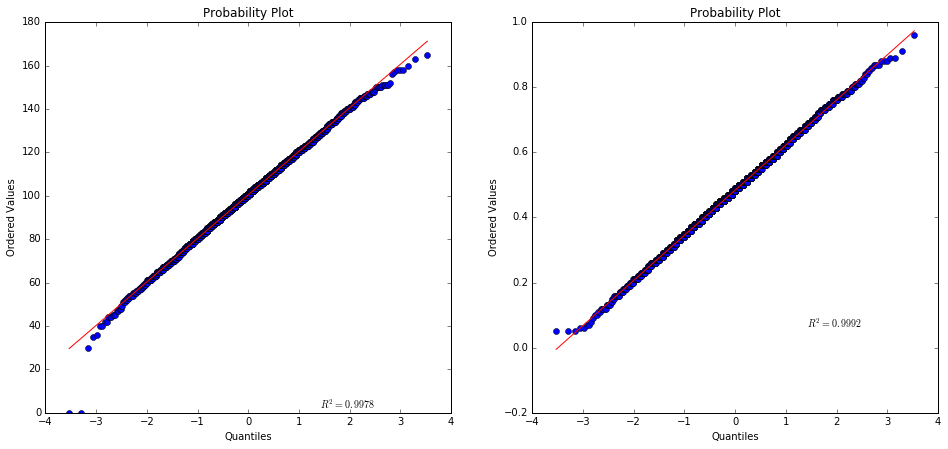

In [86]:
plt.figure(figsize(16,7))
plt.subplot(121)
scipy.stats.probplot(data['day_calls'], dist="norm", plot=pylab)
plt.subplot(122)
scipy.stats.probplot(data['mes_estim'], dist="norm", plot=pylab)
pylab.show()

#### 8.

Посчитайте значение коэффицента корреляции Крамера между двумя признаками: штатом (state) и оттоком пользователей (churn) для всех пользователей, которые находились в контрольной группе (treatment=1). Что можно сказать о достигаемом уровне значимости при проверке гипотезы о равенство нулю этого коэффициента?

In [87]:
t1 = data[data.treatment == 1]

possible_states = t1['state'].unique()
possible_churns = t1['churn'].unique()

possible_states, possible_churns

(array(['KS', 'OH', 'LA', 'IA', 'VT', 'CO', 'WY', 'MO', 'GA', 'AK', 'MA',
        'NJ', 'AR', 'MI', 'IN', 'MN', 'SD', 'TX', 'DC', 'NY', 'OR', 'AZ',
        'MS', 'UT', 'ME', 'ID', 'FL', 'NV', 'WA', 'WV', 'NH', 'VA', 'NM',
        'KY', 'MT', 'PA', 'RI', 'DE', 'OK', 'NE', 'CT', 'WI', 'CA', 'NC',
        'MD', 'TN', 'AL', 'IL', 'ND', 'HI', 'SC'], dtype=object),
 array(['False.', 'True.'], dtype=object))

In [88]:
def cramers_stat(confusion_matrix):
    chi2 = scipy.stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    return np.sqrt(chi2/(n*(min(confusion_matrix.shape) - 1)))

In [89]:
confusions = []
for state in possible_states:
    for churn in possible_churns:
        cond = t1[(t1.state == state) & (t1.churn == churn)]
        confusions.append(len(cond))
confusion_matrix = np.array(confusions).reshape((len(possible_states), len(possible_churns)))

In [90]:
cramers_stat(confusion_matrix)

0.20039321502033317